Magnetic Spectrometer Code Analysis
Author: Jason Cardarelli
2019

Normalized Units for Code:
The code is normalized to the base units of m, e, c, e, and $\omega_{c0}=q B_0/m$. This is similar to the OSIRIS unit system, but with $\omega_{c0}$, the cyclotron frequency of the central longitudinal energy, replacing $\omega_p$. The corrections to measures are as follows: <br>
$t'= t*\omega_{c0}$ <br>
$x'= x*\omega_{c0}/c$ <br>
$B'= B*e/(c*m*\omega_{c0}) = B/B_0$ <br>
$Energy' = Energy/(mc^2) = \gamma$ <br>

In [1]:
!pwd
%cd ../../source_code/
!make
!./run
%cd ../data/analysis/

C:\Users\evanm\Anaconda3\notebooks\MagnetSpec_ParticleTracker\continuous_field\source_code


'pwd' is not recognized as an internal or external command,
operable program or batch file.
'make' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\evanm\Anaconda3\notebooks\MagnetSpec_ParticleTracker\continuous_field\data\analysis


'.' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mpl_toolkits.mplot3d.art3d as art3d
import pandas as pd
import csv
import numpy as np
import itertools
import math
import scipy.constants as const

In [4]:
with open("../XPOS.csv") as csvfile:    
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    posx = list(csv_reader);
#     print(posx)
#     posx = [[float(y) for y in x[0:-1]] for x in posx]
    posx = [[float(y) for y in x] for x in posx]

FileNotFoundError: [Errno 2] No such file or directory: '../XPOS.csv'

In [261]:
with open("../YPOS.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',',quoting=csv.QUOTE_NONNUMERIC);
    line_count = 0;
    posy = list(csv_reader);
    posy = [[float(y) for y in x] for x in posy]

In [262]:
with open("../ZPOS.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    posz = list(csv_reader);
#     posz = [[float(y) for y in x[0:-1]] for x in posz]
    posz = [[float(y) for y in x] for x in posz]

In [263]:
with open("../MOMENTUM_X.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    px = list(csv_reader);
    px = [[float(y) for y in x] for x in px]

In [264]:
with open("../MOMENTUM_Y.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    py = list(csv_reader);
    py = [[float(y) for y in x] for x in py]

In [265]:
with open("../MOMENTUM_Z.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    pz = list(csv_reader);
    pz = [[float(y) for y in x] for x in pz]

In [266]:
with open("../TIME.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    time = list(csv_reader);
    time = [[float(y) for y in x] for x in time]
#     time = [[float(y) for y in x] for x in time]

In [267]:
with open("../ENERGY.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    energy = list(csv_reader);
    energy = [[float(y) for y in x] for x in energy]

In [268]:
magnet = pd.read_csv("../MAGNETS.csv")

In [269]:
screen = pd.read_csv("../SCREENS.csv")

In [270]:
del_time = pd.read_csv("../DEL_T.csv", dtype=float, header = -1)

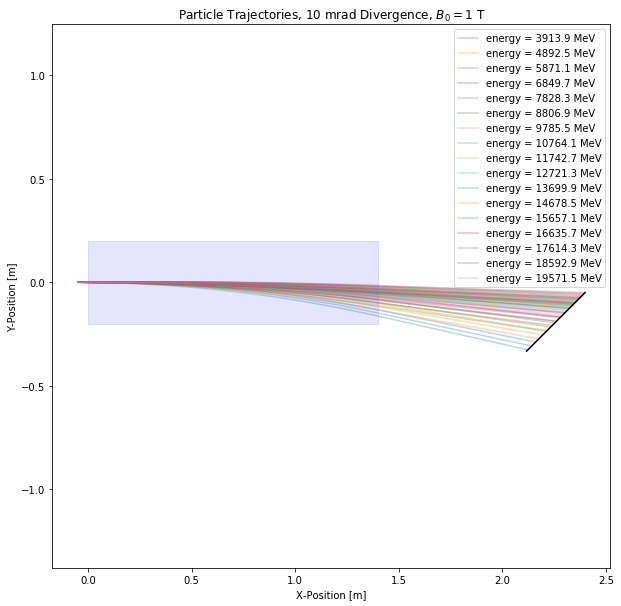

In [271]:
num_par    = len(posx);
B_Norm   = 1;
omega_c0 = const.e*B_Norm / const.m_e;
# rL_norm    = np.sqrt(-(1 - gamma*gamma)/(gamma*gamma))*gamma;

fig1, ax = plt.subplots(figsize = (10,10))
for ii in range(num_par):
    if ii%3==0:
        new_plot = ax.plot(np.array(posx[ii])*const.c/omega_c0, np.array(posy[ii])*const.c/omega_c0, label=f'energy = {energy[ii][0]:.1f} MeV', alpha = 0.3);
    else:
        ax.plot(np.array(posx[ii])*const.c/omega_c0, np.array(posy[ii])*const.c/omega_c0, label='_nolegend_', color=new_plot[0].get_color(), alpha = 0.3);

num_mag = len(magnet.index)
for ii in range(num_mag):
#     rect = patches.Rectangle((magnet.iloc[ii][2]*const.c/omega_c0,(magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)))*const.c/omega_c0,magnet.iloc[ii][5]*const.c/omega_c0,magnet.iloc[ii][6]*const.c/omega_c0,linewidth=1,edgecolor='b',facecolor='b', fill=True, alpha=0.1)
    rect = patches.Rectangle((magnet['mag_posx'][ii]*const.c/omega_c0,(magnet['mag_posy'][ii]-(magnet['width'][ii]/2.0))*const.c/omega_c0),magnet['length'][ii]*const.c/omega_c0,magnet['width'][ii]*const.c/omega_c0,linewidth=1,edgecolor='b',facecolor='b', fill=True, alpha=0.1)
#     plt.ylim((magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)-0.01),(magnet.iloc[ii][3]+(magnet.iloc[ii][6]/2)+0.01))
    ax.add_patch(rect)

num_screen = len(screen.index);
for ii in range(num_screen):
    screenX = np.array([screen['screen_low_energy_edgex'][ii],screen['screen_low_energy_edgex'][ii]+(screen['length'][ii]*np.cos(np.deg2rad(screen['degrees about z-axis'][ii])))])*const.c/omega_c0
    screenY = np.array([screen['screen_low_energy_edgey'][ii],screen['screen_low_energy_edgey'][ii]+(screen['length'][ii]*np.sin(np.deg2rad(screen['degrees about z-axis'][ii])))])*const.c/omega_c0
    plt.plot(screenX,screenY,'-k')
#     plt.xlim(0, screen.iloc[ii][1]+(screen.iloc[ii][5]*np.cos(np.deg2rad(screen.iloc[ii][4]))));
ax.set_xlabel('X-Position [m]');
ax.set_ylabel('Y-Position [m]');
ax.set_title('Particle Trajectories, 10 mrad Divergence, $B_0 =1$ T');
ax.axis('equal');
ax.legend();

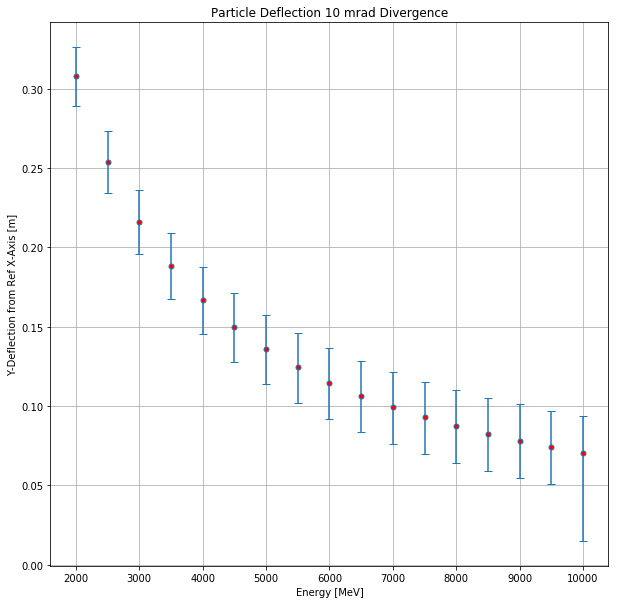

In [272]:
B_Norm   = 1;
omega_c0 = const.e*B_Norm / const.m_e;

num_par  = len(posx)

x0 = [posx[ii][0] for ii in range(num_par)];
y0 = [posy[ii][0] for ii in range(num_par)];
z0 = [posz[ii][0] for ii in range(num_par)];

xf = [posx[ii][-1] for ii in range(num_par)];
yf = [posy[ii][-1] for ii in range(num_par)];
zf = [posz[ii][-1] for ii in range(num_par)];

energy0 = [energy[ii][0] for ii in range(num_par)];

deflection_y   = [abs(yf[ii] - y0[ii])*const.c/omega_c0 for ii in range(num_par)];
deflection_abs = [np.sqrt((x0[ii]-xf[ii])**2+(y0[ii]-yf[ii])**2+(z0[ii]-zf[ii])**2)*const.c/omega_c0 for ii in range(num_par)];
alpha, beta, gamma = list(np.deg2rad(screen['degrees about z-axis'])), list(np.deg2rad(screen['degrees about y-axis'])), list(np.deg2rad(screen['degrees about x-axis']))
posx_on_screen  = [((xf[ii] - screen['screen_low_energy_edgex'][0])*(const.c/omega_c0)*(np.cos(alpha[0])*np.cos(beta[0]))+(yf[ii]-screen['screen_low_energy_edgey'][0])*(const.c/omega_c0)*(np.sin(alpha[0])*np.cos(beta[0]))-(zf[ii]-screen['screen_low_energy_edgez'][0])*(const.c/omega_c0)*(np.sin(beta[0]))) for ii in range(num_par)];
posy_on_screen  = [((xf[ii] - screen['screen_low_energy_edgex'][0])*(const.c/omega_c0)*(np.cos(alpha[0])*np.sin(beta[0])*np.sin(gamma[0]) - np.sin(alpha[0])*np.cos(gamma[0]))+(yf[ii]-screen['screen_low_energy_edgey'][0])*(const.c/omega_c0)*(np.sin(alpha[0])*np.sin(beta[0])*np.sin(gamma[0]) + np.cos(alpha[0])*np.cos(gamma[0]))+(zf[ii]-screen['screen_low_energy_edgez'][0])*(const.c/omega_c0)*(np.cos(beta[0])*np.sin(gamma[0]))) for ii in range(num_par)];
# print(posx_on_screen)

energy0 = [energy0[ii]*0.511 for ii in range(num_par)];

fig, ax = plt.subplots(figsize=(10,10));
ax.errorbar(energy0[0::3], deflection_y[0::3], yerr = (abs(np.array(deflection_y[1::3] - np.array(deflection_y[0::3]))), abs(np.array(deflection_y[2::3]) - np.array(deflection_y[0::3]))), fmt='.', mfc='red',
          ms=10, capsize=4.0);
ax.grid();
ax.set_title('Particle Deflection 10 mrad Divergence');
ax.set_xlabel('Energy [MeV]');
ax.set_ylabel('Y-Deflection from Ref X-Axis [m]');

#print(deflection_y)

dispersion_txt = open("dispersion.txt", 'w+');
dispersion_txt.write("###For an energy first is central divergence then transverse divergence trajectories (10 mrad)\n")
dispersion_txt.write("###Position on Screen [m], electron energy [MeV]\n")
for ii in range(num_par):
    dispersion_txt.write(f'{posx_on_screen[ii]:.5e}, {energy0[ii]:.5e}\n')

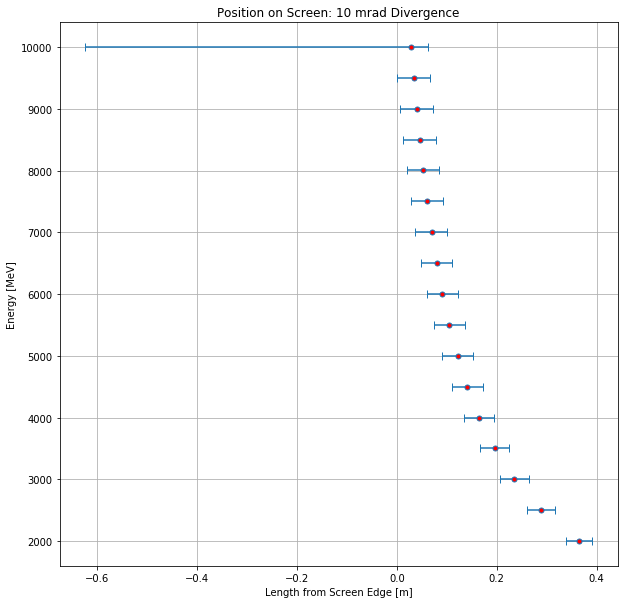

In [273]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10));
ax.errorbar(posx_on_screen[0::3], energy0[0::3], xerr = (abs(np.array(posx_on_screen[1::3]) - np.array(posx_on_screen[0::3])), abs(np.array(posx_on_screen[2::3]) - np.array(posx_on_screen[0::3]))), fmt='.', mfc='red',
          ms=10, capsize=4.0);
ax.grid();
ax.set_title('Position on Screen: 10 mrad Divergence');
ax.set_ylabel('Energy [MeV]');
ax.set_xlabel('Length from Screen Edge [m]');

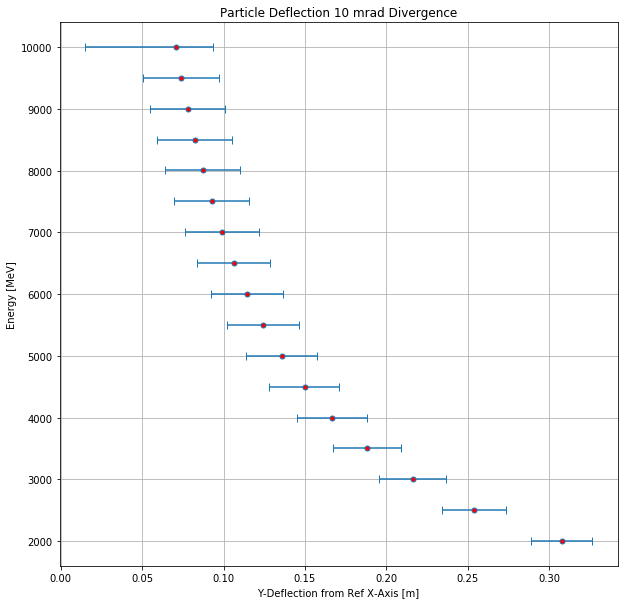

In [274]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10));
ax.errorbar(deflection_y[0::3], energy0[0::3], xerr = (abs(np.array(deflection_y[1::3] - np.array(deflection_y[0::3]))), abs(np.array(deflection_y[2::3]) - np.array(deflection_y[0::3]))), fmt='.', mfc='red',
          ms=10, capsize=4.0);
ax.grid();
ax.set_title('Particle Deflection 10 mrad Divergence');
ax.set_ylabel('Energy [MeV]');
ax.set_xlabel('Y-Deflection from Ref X-Axis [m]');

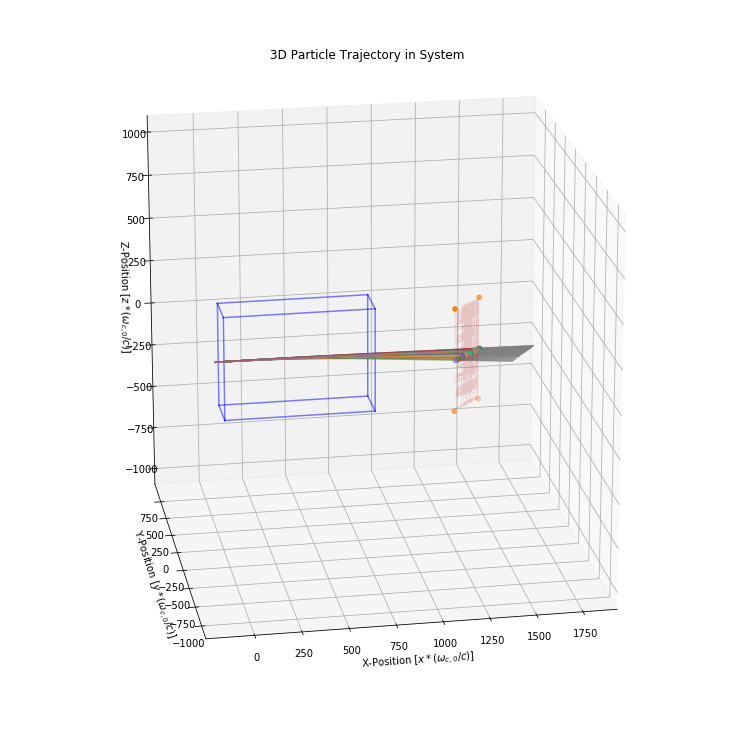

In [136]:
fig = plt.figure(figsize=(10,10))
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig)
def init(elev=20., azim = -100):
    
    from itertools import product, combinations
    %matplotlib notebook
#     %matplotlib inline
    #fig = plt.figure(figsize = (10,10))
    #ax = fig.add_subplot(111, projection='3d')
    omega_c_norm = const.elementary_charge*1/const.m_e;

    num_par    = len(posx);

    # Plot Magnets
    for ii in range(len(magnet.index)):
        rx = [magnet['mag_posx'][ii], magnet['mag_posx'][ii] + magnet['length'][ii]]
        ry = [magnet['mag_posy'][ii] - (magnet['width'][ii]/2.0),  magnet['mag_posy'][ii] + (magnet['width'][ii]/2.0)]
        rz = [magnet['mag_posz'][ii] - (magnet['height'][ii]/2.0), magnet['mag_posz'][ii] + (magnet['height'][ii]/2.0)]
        ax.plot(rx, [ry[0], ry[0]], [rz[0], rz[0]], 'b', alpha = 0.5)
        ax.plot(rx, [ry[1], ry[1]], [rz[1], rz[1]], 'b', alpha = 0.5)
        ax.plot(rx, [ry[0], ry[0]], [rz[1], rz[1]], 'b', alpha = 0.5)
        ax.plot(rx, [ry[1], ry[1]], [rz[0], rz[0]], 'b', alpha = 0.5)
        ax.plot([rx[0], rx[0]], ry, [rz[0], rz[0]], 'b', alpha = 0.5)
        ax.plot([rx[1], rx[1]], ry, [rz[1], rz[1]], 'b', alpha = 0.5)
        ax.plot([rx[0], rx[0]], ry, [rz[1], rz[1]], 'b', alpha = 0.5)
        ax.plot([rx[1], rx[1]], ry, [rz[0], rz[0]], 'b', alpha = 0.5)
        ax.plot([rx[0], rx[0]], [ry[0], ry[0]], rz, 'b', alpha = 0.5)
        ax.plot([rx[1], rx[1]], [ry[1], ry[1]], rz, 'b', alpha = 0.5)
        ax.plot([rx[0], rx[0]], [ry[1], ry[1]], rz, 'b', alpha = 0.5)
        ax.plot([rx[1], rx[1]], [ry[0], ry[0]], rz, 'b', alpha = 0.5)

    # Plot Screens
    for ii in range(len(screen.index)):
        alpha       = np.deg2rad(screen['degrees about z-axis'][ii]);
        beta        = np.deg2rad(screen['degrees about y-axis'][ii]);
        gamma       = np.deg2rad(screen['degrees about x-axis'][ii]);
        plane_point = np.array([screen['screen_low_energy_edgex'][ii], screen['screen_low_energy_edgey'][ii], screen['screen_low_energy_edgez'][ii]]);
        normal_vec  = np.array([np.sin(alpha)*(np.cos(beta)**2)*np.cos(gamma) + np.sin(beta)*(np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma)), -(np.cos(alpha)*(np.cos(beta)**2)*np.cos(gamma) + np.sin(beta)*(np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma))), np.cos(alpha)*np.cos(beta)*(np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma)) - np.sin(alpha)*np.cos(beta)*(np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma))]);
        d_plane     = plane_point.dot(normal_vec); 

        corner1_x = screen['screen_low_energy_edgex'][ii] + screen['height'][ii]*0.5*(np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma))
        corner2_x = screen['screen_low_energy_edgex'][ii] - screen['height'][ii]*0.5*(np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma))
        corner3_x = screen['screen_low_energy_edgex'][ii] + screen['length'][ii]*np.cos(alpha)*np.cos(beta) + screen['height'][ii]*0.5*(np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma))
        corner4_x = screen['screen_low_energy_edgex'][ii] + screen['length'][ii]*np.cos(alpha)*np.cos(beta) - screen['height'][ii]*0.5*(np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma))

        corner1_y = screen['screen_low_energy_edgey'][ii] + screen['height'][ii]*0.5*(np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma))
        corner2_y = screen['screen_low_energy_edgey'][ii] - screen['height'][ii]*0.5*(np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma))
        corner3_y = screen['screen_low_energy_edgey'][ii] + (screen['length'][ii]*np.sin(alpha)*np.cos(beta)) + screen['height'][ii]*0.5*(np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma))
        corner4_y = screen['screen_low_energy_edgey'][ii] + (screen['length'][ii]*np.sin(alpha)*np.cos(beta)) - screen['height'][ii]*0.5*(np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma))

        corner1_z = screen['screen_low_energy_edgez'][ii] + screen['height'][ii]*0.5*np.cos(beta)*np.cos(gamma)
        corner2_z = screen['screen_low_energy_edgez'][ii] - screen['height'][ii]*0.5*np.cos(beta)*np.cos(gamma)
        corner3_z = screen['screen_low_energy_edgez'][ii] - screen['length'][ii]*np.sin(beta) + screen['height'][ii]*0.5*np.cos(beta)*np.cos(gamma)
        corner4_z = screen['screen_low_energy_edgez'][ii] - screen['length'][ii]*np.sin(beta) - screen['height'][ii]*0.5*np.cos(beta)*np.cos(gamma)
        
        corner1  = np.array([corner1_x, corner1_y, corner1_z]);
        corner2  = np.array([corner2_x, corner2_y, corner2_z]);
        corner3  = np.array([corner3_x, corner3_y, corner3_z]);
        corner4  = np.array([corner4_x, corner4_y, corner4_z]);
        
        if normal_vec[0] != 0:
            yy     = np.linspace(min([corner1_y, corner2_y, corner3_y, corner4_y]), max([corner1_y, corner2_y, corner3_y, corner4_y]), num=200)
            zz     = np.linspace(min([corner1_z, corner2_z, corner3_z, corner4_z]), max([corner1_z, corner2_z, corner3_z, corner4_z]), num=200)
            yy, zz = np.meshgrid(yy,zz)
            xx     = ( -normal_vec[1]*yy - normal_vec[2]*zz + d_plane ) / normal_vec[0]
        elif normal_vec[1] != 0:
            zz     = np.linspace(min([corner1_z, corner2_z, corner3_z, corner4_z]), max([corner1_z, corner2_z, corner3_z, corner4_z]), num=200)
            xx     = np.linspace(min([corner1_x, corner2_x, corner3_x, corner4_x]), max([corner1_x, corner2_x, corner3_x, corner4_x]), num=200)
            xx, zz = np.meshgrid(xx,zz)
            yy     = ( -normal_vec[0]*xx - normal_vec[2]*zz + d_plane ) / normal_vec[1]
        elif normal_vec[2] != 0:
            xx = np.linspace(min([corner1_x, corner2_x, corner3_x, corner4_x]), max([corner1_x, corner2_x, corner3_x, corner4_x]), num=200)
            yy = np.linspace(min([corner1_y, corner2_y, corner3_y, corner4_y]), max([corner1_y, corner2_y, corner3_y, corner4_y]), num=200)
            xx, yy = np.meshgrid(xx,yy)
            zz = ( -normal_vec[0]*xx - normal_vec[1]*yy + d_plane ) / normal_vec[2];
            
        area0 = screen['height'][ii]*screen['length'][ii];

        tmin = [[(-((np.array(corner1 - np.array([xx[jj][kk], yy[jj][kk], zz[jj][kk]])) @ np.array(corner2 - corner1))/abs(np.array(corner2 - corner1)@np.array(corner2 - corner1)))) for jj in range(len(xx[0]))] for kk in range(len(xx))];
        closest_point = [[[corner1_x + (corner2_x - corner1_x)*tmin[jj][kk], corner1_y + (corner2_y - corner1_y)*tmin[jj][kk], corner1_z + (corner2_z - corner1_z)*tmin[jj][kk]] for jj in range(len(xx[0]))] for kk in range(len(xx))]
        dist_to_intersect = [[np.sqrt(((closest_point[jj][kk][0]-xx[jj][kk])**2) + ((closest_point[jj][kk][1]-yy[jj][kk])**2) + ((closest_point[jj][kk][2]-zz[jj][kk])**2)) for jj in range(len(xx[0]))] for kk in range(len(xx))];
        area12 = np.array([[0.5*screen['height'][ii]*dist_to_intersect[jj][kk] for jj in range(len(xx[0]))] for kk in range(len(xx))])

        tmin = [[(-((np.array(corner3 - np.array([xx[jj][kk], yy[jj][kk], zz[jj][kk]])) @ np.array(corner1 - corner3))/abs(np.array(corner1 - corner3)@np.array(corner1 - corner3)))) for jj in range(len(xx[0]))] for kk in range(len(xx))];
        closest_point = [[[corner3_x + (corner1_x - corner3_x)*tmin[jj][kk], corner3_y + (corner1_y - corner3_y)*tmin[jj][kk], corner3_z + (corner1_z - corner3_z)*tmin[jj][kk]] for jj in range(len(xx[0]))] for kk in range(len(xx))]
        dist_to_intersect = [[np.sqrt(((closest_point[jj][kk][0]-xx[jj][kk])**2) + ((closest_point[jj][kk][1]-yy[jj][kk])**2) + ((closest_point[jj][kk][2]-zz[jj][kk])**2)) for jj in range(len(xx[0]))] for kk in range(len(xx))];
        area13 = np.array([[0.5*screen['length'][ii]*dist_to_intersect[jj][kk] for jj in range(len(xx[0]))] for kk in range(len(xx))])

        tmin = [[(-((np.array(corner4 - np.array([xx[jj][kk], yy[jj][kk], zz[jj][kk]])) @ np.array(corner2 - corner4))/abs(np.array(corner2 - corner4)@np.array(corner2 - corner4)))) for jj in range(len(xx[0]))] for kk in range(len(xx))];
        closest_point = [[[corner4_x + (corner2_x - corner4_x)*tmin[jj][kk], corner4_y + (corner2_y - corner4_y)*tmin[jj][kk], corner4_z + (corner2_z - corner4_z)*tmin[jj][kk]] for jj in range(len(xx[0]))] for kk in range(len(xx))]
        dist_to_intersect = [[np.sqrt(((closest_point[jj][kk][0]-xx[jj][kk])**2) + ((closest_point[jj][kk][1]-yy[jj][kk])**2) + ((closest_point[jj][kk][2]-zz[jj][kk])**2)) for jj in range(len(xx[0]))] for kk in range(len(xx))];
        area24 = np.array([[0.5*screen['length'][ii]*dist_to_intersect[jj][kk] for jj in range(len(xx[0]))] for kk in range(len(xx))])

        tmin = [[(-((np.array(corner3 - np.array([xx[jj][kk], yy[jj][kk], zz[jj][kk]])) @ np.array(corner4 - corner3))/abs(np.array(corner4 - corner3)@np.array(corner4 - corner3)))) for jj in range(len(xx[0]))] for kk in range(len(xx))];
        closest_point = [[[corner3_x + (corner4_x - corner3_x)*tmin[jj][kk], corner3_y + (corner4_y - corner3_y)*tmin[jj][kk], corner3_z + (corner4_z - corner3_z)*tmin[jj][kk]] for jj in range(len(xx[0]))] for kk in range(len(xx))]
        dist_to_intersect = [[np.sqrt(((closest_point[jj][kk][0]-xx[jj][kk])**2) + ((closest_point[jj][kk][1]-yy[jj][kk])**2) + ((closest_point[jj][kk][2]-zz[jj][kk])**2)) for jj in range(len(xx[0]))] for kk in range(len(xx))];
        area34 = np.array([[0.5*screen['height'][ii]*dist_to_intersect[jj][kk] for jj in range(len(xx[0]))] for kk in range(len(xx))])

        xx[(area12+ area13+ area24+ area34) > area0] = np.nan
#         print(normal_vec)
        ax.plot_surface(xx, yy, zz, alpha=0.2, color = 'r')
        ax.scatter(screen['screen_low_energy_edgex'][ii],screen['screen_low_energy_edgey'][ii],screen['screen_low_energy_edgez'][ii])
        ax.scatter([corner1_x, corner2_x, corner3_x, corner4_x], [corner1_y, corner2_y, corner3_y, corner4_y], [corner1_z, corner2_z, corner3_z, corner4_z])

    # Plot Particles
    for ii in range(num_par):
        ax.plot(posx[ii], posy[ii], posz[ii], alpha=0.6);
        ax.scatter(posx[ii][-1], posy[ii][-1], posz[ii][-1], alpha=0.6)
        xline = np.linspace(posx[ii][-1], posx[ii][-1]+300, 2)
        #print(xline)
        yline = posy[ii][-1] + py[ii][-1]*((xline - posx[ii][-1])/px[ii][-1])
        zline = posz[ii][-1] + pz[ii][-1]*((xline - posx[ii][-1])/px[ii][-1])
        ax.plot3D(xline, yline, zline, 'gray', alpha=0.8)

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    zmin, zmax = ax.get_zlim()
    max_range = np.array([xmax-xmin, ymax-ymin, zmax-zmin]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(xmax+xmin)
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(ymax+ymin)
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(zmax+zmin)
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')
    
        
    
    ax.set_xlabel(r"X-Position [$x*(\omega_{c,0} / c)$]")
    ax.set_ylabel(r"Y-Position [$y*(\omega_{c,0} / c)$]")
    ax.set_zlabel(r"Z-Position [$z*(\omega_{c,0} / c)$]")

    ax.set_title("3D Particle Trajectory in System")
    #ax.axis('equal');
    
    ax.view_init(elev, azim);
    return fig
from matplotlib import animation
def animate(i):
    ax.view_init(elev=40., azim=i)
    return fig,

#anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, repeat=True)

#anim.save('rotation_of_system_2.gif', fps=30, extra_args=['-vcodec', 'libx264'])#, writer='imagemagick')
init()

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
def init(elev=20., azim = -100):
    from mpl_toolkits.mplot3d import Axes3D
    from itertools import product, combinations
#     %matplotlib notebook
#     %matplotlib inline
    #fig = plt.figure(figsize = (10,10))
    #ax = fig.add_subplot(111, projection='3d')
    omega_c_norm = const.elementary_charge*1/const.m_e;

    num_par    = len(posx);

    # Plot Magnets
    for ii in range(len(magnet.index)):
        rx = [magnet['mag_posx'][ii], magnet['mag_posx'][ii] + magnet['length'][ii]]
        ry = [magnet['mag_posy'][ii] - (magnet['width'][ii]/2.0),  magnet['mag_posy'][ii] + (magnet['width'][ii]/2.0)]
        rz = [magnet['mag_posz'][ii] - (magnet['height'][ii]/2.0), magnet['mag_posz'][ii] + (magnet['height'][ii]/2.0)]
        ax.plot(rx, [ry[0], ry[0]], [rz[0], rz[0]], 'b', alpha = 0.5)
        ax.plot(rx, [ry[1], ry[1]], [rz[1], rz[1]], 'b', alpha = 0.5)
        ax.plot(rx, [ry[0], ry[0]], [rz[1], rz[1]], 'b', alpha = 0.5)
        ax.plot(rx, [ry[1], ry[1]], [rz[0], rz[0]], 'b', alpha = 0.5)
        ax.plot([rx[0], rx[0]], ry, [rz[0], rz[0]], 'b', alpha = 0.5)
        ax.plot([rx[1], rx[1]], ry, [rz[1], rz[1]], 'b', alpha = 0.5)
        ax.plot([rx[0], rx[0]], ry, [rz[1], rz[1]], 'b', alpha = 0.5)
        ax.plot([rx[1], rx[1]], ry, [rz[0], rz[0]], 'b', alpha = 0.5)
        ax.plot([rx[0], rx[0]], [ry[0], ry[0]], rz, 'b', alpha = 0.5)
        ax.plot([rx[1], rx[1]], [ry[1], ry[1]], rz, 'b', alpha = 0.5)
        ax.plot([rx[0], rx[0]], [ry[1], ry[1]], rz, 'b', alpha = 0.5)
        ax.plot([rx[1], rx[1]], [ry[0], ry[0]], rz, 'b', alpha = 0.5)

    # Plot Screens
    for ii in range(len(screen.index)):
        alpha       = np.deg2rad(screen['degrees about z-axis'][ii]);
        beta        = np.deg2rad(screen['degrees about y-axis'][ii]);
        gamma       = np.deg2rad(screen['degrees about x-axis'][ii]);
        plane_point = np.array([screen['screen_low_energy_edgex'][ii], screen['screen_low_energy_edgey'][ii], screen['screen_low_energy_edgez'][ii]]);
        normal_vec  = np.array([np.sin(alpha)*(np.cos(beta)**2)*np.cos(gamma) + np.sin(beta)*(np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma)), -(np.cos(alpha)*(np.cos(beta)**2)*np.cos(gamma) + np.sin(beta)*(np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma))), np.cos(alpha)*np.cos(beta)*(np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma)) - np.sin(alpha)*np.cos(beta)*(np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma))]);
        d_plane     = plane_point.dot(normal_vec); 

        corner1_x = screen['screen_low_energy_edgex'][ii] + screen['height'][ii]*0.5*(np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma))
        corner2_x = screen['screen_low_energy_edgex'][ii] - screen['height'][ii]*0.5*(np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma))
        corner3_x = screen['screen_low_energy_edgex'][ii] + screen['length'][ii]*np.cos(alpha)*np.cos(beta) + screen['height'][ii]*0.5*(np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma))
        corner4_x = screen['screen_low_energy_edgex'][ii] + screen['length'][ii]*np.cos(alpha)*np.cos(beta) - screen['height'][ii]*0.5*(np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma))

        corner1_y = screen['screen_low_energy_edgey'][ii] + screen['height'][ii]*0.5*(np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma))
        corner2_y = screen['screen_low_energy_edgey'][ii] - screen['height'][ii]*0.5*(np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma))
        corner3_y = screen['screen_low_energy_edgey'][ii] + (screen['length'][ii]*np.sin(alpha)*np.cos(beta)) + screen['height'][ii]*0.5*(np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma))
        corner4_y = screen['screen_low_energy_edgey'][ii] + (screen['length'][ii]*np.sin(alpha)*np.cos(beta)) - screen['height'][ii]*0.5*(np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma))

        corner1_z = screen['screen_low_energy_edgez'][ii] + screen['height'][ii]*0.5*np.cos(beta)*np.cos(gamma)
        corner2_z = screen['screen_low_energy_edgez'][ii] - screen['height'][ii]*0.5*np.cos(beta)*np.cos(gamma)
        corner3_z = screen['screen_low_energy_edgez'][ii] - screen['length'][ii]*np.sin(beta) + screen['height'][ii]*0.5*np.cos(beta)*np.cos(gamma)
        corner4_z = screen['screen_low_energy_edgez'][ii] - screen['length'][ii]*np.sin(beta) - screen['height'][ii]*0.5*np.cos(beta)*np.cos(gamma)
        corner1  = np.array([corner1_x, corner1_y, corner1_z]);
        corner2  = np.array([corner2_x, corner2_y, corner2_z]);
        corner3  = np.array([corner3_x, corner3_y, corner3_z]);
        corner4  = np.array([corner4_x, corner4_y, corner4_z]);
        if normal_vec[0] != 0:
            yy     = np.linspace(min([corner1_y, corner2_y, corner3_y, corner4_y]), max([corner1_y, corner2_y, corner3_y, corner4_y]), num=200)
            zz     = np.linspace(min([corner1_z, corner2_z, corner3_z, corner4_z]), max([corner1_z, corner2_z, corner3_z, corner4_z]), num=200)
            yy, zz = np.meshgrid(yy,zz)
            xx     = ( -normal_vec[1]*yy - normal_vec[2]*zz + d_plane ) / normal_vec[0]

            if gamma < np.pi and gamma != np.pi/2.:
                xx[(yy > (((corner3_y - corner1_y)/(corner3_z - corner1_z))*zz + (corner1_y - corner1_z*((corner3_y - corner1_y)/(corner3_z - corner1_z))))) & (zz > (((corner3_z - corner1_z)/(corner3_y - corner1_y))*yy + (corner1_z - corner1_y*((corner3_z - corner1_z)/(corner3_y - corner1_y)))))] = np.nan
                xx[(yy < (((corner4_y - corner2_y)/(corner4_z - corner2_z))*zz + (corner2_y - corner2_z*((corner4_y - corner2_y)/(corner4_z - corner2_z))))) & (zz < (((corner4_z - corner2_z)/(corner4_y - corner2_y))*yy + (corner2_z - corner2_y*((corner4_z - corner2_z)/(corner4_y - corner2_y)))))] = np.nan
                xx[(yy < (((corner1_y - corner2_y)/(corner1_z - corner2_z))*zz + (corner2_y - corner2_z*((corner1_y - corner2_y)/(corner1_z - corner2_z))))) & (zz > (((corner1_z - corner2_z)/(corner1_y - corner2_y))*yy + (corner2_z - corner2_y*((corner1_z - corner2_z)/(corner1_y - corner2_y)))))] = np.nan
                xx[(yy > (((corner4_y - corner3_y)/(corner4_z - corner3_z))*zz + (corner3_y - corner3_z*((corner4_y - corner3_y)/(corner4_z - corner3_z))))) & (zz < (((corner4_z - corner3_z)/(corner4_y - corner3_y))*yy + (corner3_z - corner3_y*((corner4_z - corner3_z)/(corner4_y - corner3_y)))))] = np.nan
            if gamma > np.pi and gamma !=2.0*np.pi and gamma != 3.*np.pi/2.:
                xx[(yy < (((corner3_y - corner1_y)/(corner3_z - corner1_z))*zz + (corner1_y - corner1_z*((corner3_y - corner1_y)/(corner3_z - corner1_z))))) & (zz < (((corner3_z - corner1_z)/(corner3_y - corner1_y))*yy + (corner1_z - corner1_y*((corner3_z - corner1_z)/(corner3_y - corner1_y)))))] = np.nan
                xx[(yy > (((corner4_y - corner2_y)/(corner4_z - corner2_z))*zz + (corner2_y - corner2_z*((corner4_y - corner2_y)/(corner4_z - corner2_z))))) & (zz > (((corner4_z - corner2_z)/(corner4_y - corner2_y))*yy + (corner2_z - corner2_y*((corner4_z - corner2_z)/(corner4_y - corner2_y)))))] = np.nan
                xx[(yy > (((corner1_y - corner2_y)/(corner1_z - corner2_z))*zz + (corner2_y - corner2_z*((corner1_y - corner2_y)/(corner1_z - corner2_z))))) & (zz > (((corner1_z - corner2_z)/(corner1_y - corner2_y))*yy + (corner2_z - corner2_y*((corner1_z - corner2_z)/(corner1_y - corner2_y)))))] = np.nan
                xx[(yy < (((corner4_y - corner3_y)/(corner4_z - corner3_z))*zz + (corner3_y - corner3_z*((corner4_y - corner3_y)/(corner4_z - corner3_z))))) & (zz < (((corner4_z - corner3_z)/(corner4_y - corner3_y))*yy + (corner3_z - corner3_y*((corner4_z - corner3_z)/(corner4_y - corner3_y)))))] = np.nan
        elif normal_vec[1] != 0:
            zz     = np.linspace(min([corner1_z, corner2_z, corner3_z, corner4_z]), max([corner1_z, corner2_z, corner3_z, corner4_z]), num=200)
            xx     = np.linspace(min([corner1_x, corner2_x, corner3_x, corner4_x]), max([corner1_x, corner2_x, corner3_x, corner4_x]), num=200)
            xx, zz = np.meshgrid(xx,zz)
            yy     = ( -normal_vec[0]*xx - normal_vec[2]*zz + d_plane ) / normal_vec[1]
            if beta < np.pi and beta !=0 and beta != np.pi/2.:
                yy[zz > (((corner3_z - corner1_z)/(corner3_x - corner1_x))*xx + (corner1_z - corner1_x*((corner3_z - corner1_z)/(corner3_x - corner1_x))))] = np.nan
                yy[zz < (((corner4_z - corner2_z)/(corner4_x - corner2_x))*xx + (corner2_z - corner2_x*((corner4_z - corner2_z)/(corner4_x - corner2_x))))] = np.nan;
                yy[zz > (((corner1_z - corner2_z)/(corner1_x - corner2_x))*xx + (corner2_z - corner2_x*((corner1_z - corner2_z)/(corner1_x - corner2_x))))] = np.nan;
                yy[zz < (((corner4_z - corner3_z)/(corner4_x - corner3_x))*xx + (corner3_z - corner3_x*((corner4_z - corner3_z)/(corner4_x - corner3_x))))] = np.nan;
            if beta > np.pi and beta!=2*np.pi and beta != 3*np.pi/2.:
                yy[zz < (((corner3_z - corner1_z)/(corner3_x - corner1_x))*xx + (corner1_z - corner1_x*((corner3_z - corner1_z)/(corner3_x - corner1_x))))] = np.nan
                yy[zz > (((corner4_z - corner2_z)/(corner4_x - corner2_x))*xx + (corner2_z - corner2_x*((corner4_z - corner2_z)/(corner4_x - corner2_x))))] = np.nan;
                yy[zz < (((corner1_z - corner2_z)/(corner1_x - corner2_x))*xx + (corner2_z - corner2_x*((corner1_z - corner2_z)/(corner1_x - corner2_x))))] = np.nan;
                yy[zz > (((corner4_z - corner3_z)/(corner4_x - corner3_x))*xx + (corner3_z - corner3_x*((corner4_z - corner3_z)/(corner4_x - corner3_x))))] = np.nan;
        elif normal_vec[2] != 0:
            xx = np.linspace(min([corner1_x, corner2_x, corner3_x, corner4_x]), max([corner1_x, corner2_x, corner3_x, corner4_x]), num=200)
            yy = np.linspace(min([corner1_y, corner2_y, corner3_y, corner4_y]), max([corner1_y, corner2_y, corner3_y, corner4_y]), num=200)
            xx, yy = np.meshgrid(xx,yy)
            zz = ( -normal_vec[0]*xx - normal_vec[1]*yy + d_plane ) / normal_vec[2];
            if alpha < np.pi and alpha !=0 and alpha != np.pi/2.:
                zz[xx > (((corner3_x - corner1_x)/(corner3_y - corner1_y))*yy + (corner1_x - corner1_y*((corner3_x - corner1_x)/(corner3_y - corner1_y))))] = np.nan
                zz[xx < (((corner4_x - corner2_x)/(corner4_y - corner2_y))*yy + (corner2_x - corner2_y*((corner4_x - corner2_x)/(corner4_y - corner2_y))))] = np.nan
                zz[xx > (((corner1_x - corner2_x)/(corner1_y - corner2_y))*yy + (corner2_x - corner2_y*((corner1_x - corner2_x)/(corner1_y - corner2_y))))] = np.nan
                zz[xx < (((corner4_x - corner3_x)/(corner4_y - corner3_y))*yy + (corner3_x - corner3_y*((corner4_x - corner3_x)/(corner4_y - corner3_y))))] = np.nan
            if alpha > np.pi and alpha !=2.0*np.pi and alpha != 3.*np.pi/2.:
                zz[xx < (((corner3_z - corner1_z)/(corner3_y - corner1_y))*yy + (corner1_x - corner1_y*((corner3_x - corner1_x)/(corner3_y - corner1_y))))] = np.nan
                zz[xx > (((corner4_z - corner2_z)/(corner4_y - corner2_y))*yy + (corner2_x - corner2_y*((corner4_x - corner2_x)/(corner4_y - corner2_y))))] = np.nan
                zz[xx < (((corner1_z - corner2_z)/(corner1_y - corner2_y))*yy + (corner2_x - corner2_y*((corner1_x - corner2_x)/(corner1_y - corner2_y))))] = np.nan
                zz[xx > (((corner4_z - corner3_z)/(corner4_y - corner3_y))*yy + (corner3_x - corner3_y*((corner4_x - corner3_x)/(corner4_y - corner3_y))))] = np.nan
        
        
        #print(f'normal vector is {normal_vec}')
        #print(f'gamma is {gamma}')
        #print(f'xx is {xx}\nyy is {yy}\nzz is {zz}')
        ax.plot_surface(xx, yy, zz, alpha=0.2, color = 'r')
        ax.scatter(screen['screen_low_energy_edgex'][ii],screen['screen_low_energy_edgey'][ii],screen['screen_low_energy_edgez'][ii])
        ax.scatter([corner1_x, corner2_x, corner3_x, corner4_x], [corner1_y, corner2_y, corner3_y, corner4_y], [corner1_z, corner2_z, corner3_z, corner4_z])

    # Plot Particles
    for ii in range(num_par):
        ax.plot(posx[ii], posy[ii], posz[ii], alpha=0.6);

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    zmin, zmax = ax.get_zlim()
    max_range = np.array([xmax-xmin, ymax-ymin, zmax-zmin]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(xmax+xmin)
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(ymax+ymin)
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(zmax+zmin)
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')
        
    
    ax.set_xlabel(r"X-Position [$x*(\omega_{c,0} / c)$]")
    ax.set_ylabel(r"Y-Position [$y*(\omega_{c,0} / c)$]")
    ax.set_zlabel(r"Z-Position [$z*(\omega_{c,0} / c)$]")

    ax.set_title("3D Particle Trajectory in System")
    #ax.axis('equal');
    
    ax.view_init(elev, azim);
    return fig
from matplotlib import animation
def animate(i):
    ax.view_init(elev=40., azim=i)
    return fig,

#anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, repeat=True)

#anim.save('rotation_of_system_2.gif', fps=30, extra_args=['-vcodec', 'libx264'])#, writer='imagemagick')
init();

In [ ]:
print(xx[0])

In [ ]:
num_par    = len(posx);
fig, ax = plt.subplots()
for ii in range(num_par):
    ax.plot(px[ii], py[ii],'.', label='$\Delta t =$ %.2f /$\omega_{c0}$' % (del_time.loc[ii][0]));
ax.legend(bbox_to_anchor=(1, 1));
ax.set_xlabel('Normalized X-Momentum');
ax.set_ylabel('Normalized Y-Momentum');
ax.set_title('Particle Momenta Time Step Test for $\gamma = %.1f$' % (energy[0][0]));
# plt.savefig('Momenta_Time_Test.png',dpi=300, bbox_inches = "tight")

In [ ]:
num_par    = len(posx);
fig, ax = plt.subplots();
for ii in range(num_par):
    ax.plot(px[ii], pz[ii],'.', label='$\Delta t =$ %.2f /$\omega_{c0}$' % (del_time.loc[ii][0]));
ax.legend(bbox_to_anchor=(1, 1));
ax.set_xlabel('Normalized X-Momentum');
ax.set_ylabel('Normalized Z-Momentum');
ax.set_title('Particle Momenta Time Step Test for $\gamma = 10$');
# plt.savefig('Momenta_Around_dt_1.png',dpi=300, bbox_inches = "tight")

In [ ]:
import scipy.constants as const
num_par     = len(posx);
gamma       = energy[0][0];
rL_norm     = np.sqrt(-(1 - gamma*gamma)/(gamma*gamma))*gamma;
# rL_norm     = 9.9498743710662;
rel_err     = [[(1 - ((np.sqrt((posx[i][jj])**2 + posy[i][jj]**2))/(rL_norm))) for jj in range(len(posx[i]))] for i in range(num_par)]
rel_err_avg = [sum(row)/len(row) for row in rel_err]
rel_err_max = [max(row) for row in rel_err]

fig, [ax1, ax2, ax3] = plt.subplots(3,1, figsize = (10,10));


for ii in range(num_par):
    ax1.plot(posx[ii], posy[ii],'.', label='$\Delta t$ = %.2f /$\omega_{c0}$' % (del_time.loc[ii][0]));
rL_BAR_circ = plt.Circle((0, 0), rL_norm, color='r', fill = False, lw=10, ls ='--', label='Analytic orbit', alpha=1);
ax1.add_patch(rL_BAR_circ);
ax1.legend(bbox_to_anchor=(1, 1));
ax1.set_xlabel('X-Position');
ax1.set_ylabel('Y-Position');
ax1.set_title('Relative Error Particle Time Step Test for $\gamma = %.1f$' % (energy[0][0]));

time_norm = [[jj/(3.14*2*gamma) for jj in x] for x in time]
for ii in range(num_par):
    if ii<0:
        continue
    ax2.plot(time_norm[ii], rel_err[ii], label='$\Delta t$ = %.2f /$\omega_{c0}$' % (del_time.loc[ii][0]));

ax2.set_xlabel('Normalized Time (Relativistic Cyclotron Period)');
ax2.set_ylabel('Relative Error in Orbit');
ax2.set_xlim(0,4);


ax3.plot(del_time/(const.pi*2*gamma), np.abs(rel_err_avg),'o-')
# ax3.set_title("Boris Algorithm: Time Resolution & Spatial Relative Error")
ax3.set_xlabel("Normalized Time Step (Relativistic Cyclotron Period)");
ax3.set_ylabel("Avg. Relative Error In Orbit");
ax3.set_xscale('log', basex=2)
ax3.set_yscale('log', basey=2)
# ax3.get_yaxis().get_major_formatter().set_useOffset(False)


In [ ]:
num_par     = len(posx);
gamma       = energy[0][0];
rL_norm    = np.sqrt(-(1 - gamma*gamma)/(gamma*gamma))*gamma;
abs_err     = [[(np.sqrt((posx[i][jj])**2 + posy[i][jj]**2) - rL_norm) for jj in range(len(posx[i]))] for i in range(num_par)]
abs_err_avg = [sum(row)/len(row) for row in abs_err]
abs_err_max = [max(row) for row in abs_err]

fig, [ax2, ax3, ax4] = plt.subplots(3,1, figsize = (10,10));


# for ii in range(num_par):
#     ax1.plot(posx[ii]/rL_norm, posy[ii]/rL_norm,'.', label='$\Delta t$ = %.2f *$T_{rel. gyro.}$' % (del_time.loc[ii][0]/(2*const.pi*gamma)));
# #     ax.plot(posx[ii], posy[ii],'.');
# # rL_BAR_circ = plt.Circle((0, 0), rL_norm, color='r', fill = False, lw=10, ls ='--', label='Analytic orbit', alpha=1);
# rL_BAR_circ = plt.Circle((0, 0), 1.0, color='r', fill = False, lw=10, ls ='--', label='Analytic orbit', alpha=1);
# ax1.add_patch(rL_BAR_circ);
# ax1.legend(bbox_to_anchor=(1, 1));
# # ax1.set_xlabel('X-Position');
# ax1.set_ylabel('X/Y-Position');
# ax1.set_title('Absolute Error Particle Time Step Test for $\gamma = %.1f$' % (energy[0][0]));

time_norm = [[jj/(const.pi*2*gamma) for jj in x] for x in time]
for ii in range(num_par):
    if ii<0:
        continue
    ax2.plot(time_norm[ii], abs_err[ii], label='$\Delta t$ = %.2f *$T_{rel. gyro.}$' % (del_time.loc[ii][0]/(2*const.pi*gamma)));
ax2.set_title('Absolute Error Particle Time Step Test for $\gamma = %.1f$' % (energy[0][0]));
ax2.legend(bbox_to_anchor=(1.15, 0.3));
ax2.set_xlabel('Normalized Time (Relativistic Cyclotron Period)');
ax2.set_ylabel('Absolute Error in Orbit');
# ax2.set_title('Time Resolved Error for $\gamma = 5$, Time Limit$ = 8 \pi \gamma$');
ax2.set_xlim(0,10);



ax3.plot(del_time/(const.pi*2*gamma), np.abs(abs_err_avg),'o-')
# ax3.set_title("Boris Algorithm: Time Resolution & Spatial Relative Error")
ax3.set_xlabel("Normalized Time Step (Relativistic Cyclotron Period)");
ax3.set_ylabel("Avg. Absolute Error In Orbit");
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
# ax3.set_xscale('log', basex=2)
ax3.set_yscale('log', basey=2)
# ax3.set_xlim(0,0.015625);
# plt.tight_layout()
# Average relative error per cycle over time for each particle???
# print(np.abs(rel_err_avg));



# ax4.plot(del_time/(const.pi*2*gamma), abs_err_max, 'o-')
ax4.plot(del_time/(const.pi*2*gamma), [ii*const.c*const.m_e/(const.e*1.0) for ii in abs_err_max], 'o-')
ax4.set_ylabel("Max. Absolute Error In Orbit [m]");
ax4.set_xlabel("Normalized Time Step (Relativistic Cyclotron Period)");
# ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax4.set_xscale('log', basex=2)
ax4.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# ax5.set_yscale('log', basey=2)

In [ ]:
# screen['height'][0]
screen

Next cell is to make a gif of particle trajectory:

In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

num_dumps = len(posx);
gif_file_name_to_save = 'BorisTimeStepTrajectories_trail_space.gif';
relative_path_to_save = './';
posx_max = max(max(posx));
posy_max = max(max(posy));
posx_min = min(min(posx));
posy_min = min(min(posy));

def den_plot(dump,ii):
    if ii > 0:
        plt.close();
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(posx[dump][ii-2:ii+2],posy[dump][ii-2:ii+2], '.', label='del_t = %.2f /$\omega_{c0}$' % (del_time.loc[dump][0]));
    rL_BAR_circ = plt.Circle((0, 0), 10, color='r', fill = False, lw=1, ls ='--', label='Analytic orbit', alpha=0.5);
    ax.add_patch(rL_BAR_circ);
    ax.legend(bbox_to_anchor=(1, 1));
    ax.set_xlim(-15, 15);
    ax.set_ylim(-15, 15);
    ax.set_xlabel('Normalized X-Position');
    ax.set_ylabel('Normalized Y-Position');
    ax.set_title('Particle Trajectory Time Step Test for gamma = 10, time limit 20*pi*gamma');
    
#     plt.axis('off')
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image  = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave((relative_path_to_save + gif_file_name_to_save) , [den_plot(i,ii) for i in range(num_dumps-2) for ii in range(int(len(posx[i])/10))], fps=30)

In [ ]:
# print(posz)

In [ ]:
import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
fig, ax = plt.subplots(figsize=(20,16));
ax.plot(posx[0], posy[0],'.');
ax.set_xlabel(r"X Position [ Normalized(c/$\omega _{c,0})]$");
ax.set_ylabel(r"Y Position [Normalized (c/$\omega _{c,0})]$");
ax.set_title("X & Y Positions for electrons in ");

In [ ]:
#NORMALIZING UNIT SYSTEM:
E0 = 1000            #MeV
B0 = 1               #T
qe = 1.602*10**-19   #C
me = 9.11* 10**-31   #kg
c  = 299792458       #m/s
gamma0 = (E0+0.511)/0.511


omegaNorm  = (qe*B0)/(me)
lengthNorm = omegaNorm/c


v_perp0  = c*((1-(1/(gamma0*gamma0)))**0.5)
rL0_real = gamma0*me*v_perp0/(qe*B0)
rL0_BAR  = rL0_real*lengthNorm


cm_30    = 0.3*lengthNorm
cm_20    = 0.2*lengthNorm
cm_10    = 0.1*lengthNorm
cm_03    = 0.03*lengthNorm


#display('qe         = %.3E' % qe)
#display('me         = %.3E' % me)
#display('c          = %.3E' % c)
display('omegaNorm  = %.3E' % omegaNorm)
#display('lengthNorm = %.3E' % lengthNorm)
display('gamma0     = %.3f' % gamma0)
display("rL0_BAR    = %.3f" % rL0_BAR)
display("rL0_real   = %.3f" % rL0_real)
display("30 cm      = %.3f" % cm_30)
display("10 cm      = %.3f" % cm_10)
display("3 cm       = %.3f" % cm_03)

In [ ]:
plot_real_units = False

plot_pos = True
plot_mom = False
plot_lamour_radius = False
plot_magnet = False
plot_screen = False

In [ ]:
# num_par    = posx.shape[0]
num_par    = len(posx);
num_mag    = magnet.shape[0]
num_screen = screen.shape[0]

# %matplotlib inline 
mp.use('Agg')

plt.rcParams['figure.figsize'] = [10, 5]
fig,ax = plt.subplots(1)

if plot_pos == True:
    for ii in range(num_par):
        if plot_real_units == True:
#             plt.plot(posx.iloc[ii]/lengthNorm,posy.loc[ii]/lengthNorm,label='Energy = %.2f MeV' % (float(energy.iloc[ii][1])*0.511-0.511))
            ax.plot(posx[ii], posy[ii]);
        else:
#             ax.plot(posx,posy, label='Energy = %.3f MeV, del_t = %.2f $\omega_{c0}$' % (energy[ii][1]*0.511-0.511, del_time.loc[ii][0]))
            plt.plot(posx[ii],posy[ii], label='Energy = %.3f MeV, del_t = %.2f $\omega_{c0}$' % (float(energy[ii][1])*0.511-0.511, del_time.loc[ii][0]));
#             plt.plot(posx.iloc[ii],posy.iloc[ii],label='Energy = %.3f MeV, del_t = %.2f $\omega_{c0}$' % (energy.iloc[ii][1]*0.511-0.511, del_time.loc[ii][0]))
        
if plot_mom == True:
    for ii in range(num_par):
        if plot_real_units == True:
            plt.subplot(floor(num_par/2),ceil(num_par/2),ii+1)
            plt.plot(px.iloc[ii]/lengthNorm,py.loc[ii]/lengthNorm,label='Energy = %.3f MeV' % (float(energy.iloc[ii][1])*0.511))
        else:
            plt.subplot(math.floor(num_par/2),math.ceil(num_par/2),ii+1)
            plt.plot(px.iloc[ii]+10*ii,py.iloc[ii]+10*ii,label='Energy = \n %.3f MeV \n del_t = \n %.2f $\omega_{c0}$' % (energy.iloc[ii][1], del_time.loc[ii][0]))
            plt.legend()
            plt.xlabel('$p_x /(c m)$')
            plt.ylabel('$p_y /(c m)$')
    
if plot_screen == True:
    for ii in range(num_screen):
        screenX = np.array([screen.iloc[ii][1],screen.iloc[ii][1]+(screen.iloc[ii][5]*np.cos(np.radians(screen.iloc[ii][4])))])
        screenY = np.array([screen.iloc[ii][2],screen.iloc[ii][2]+(screen.iloc[ii][5]*np.sin(np.radians(screen.iloc[ii][4])))])
        if plot_real_units == True:
            plt.plot(screenX/lengthNorm,screenY/lengthNorm,'-k')
        else:
            plt.plot(screenX,screenY,'-k')
        
if plot_magnet == True:
    for ii in range(num_mag):
        if plot_real_units == True:
            rect = patches.Rectangle((magnet.iloc[ii][2]/lengthNorm,(magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2))/lengthNorm),magnet.iloc[ii][5]/lengthNorm,magnet.iloc[ii][6]/lengthNorm,linewidth=1,edgecolor='k',facecolor='none')
            plt.ylim((magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)-0.01)/lengthNorm,(magnet.iloc[ii][3]+(magnet.iloc[ii][6]/2)+0.01)/lengthNorm)
        else:
            rect = patches.Rectangle((magnet.iloc[ii][2],magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)),magnet.iloc[ii][5],magnet.iloc[ii][6],linewidth=1,edgecolor='k',facecolor='none')
            plt.ylim(magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)-0.01,magnet.iloc[ii][3]+(magnet.iloc[ii][6]/2)+0.01)
        ax.add_patch(rect)
        plt.xlim()

if plot_lamour_radius == True:
    if plot_real_units == True:
        rL_BAR_circ = plt.Circle((0, -rL0_BAR/lengthNorm), rL0_BAR/lengthNorm, color='r', fill = False, lw=5, ls ='--', label='RL0')
    else:
        rL_BAR_circ = plt.Circle((0, -rL0_BAR), rL0_BAR, color='r', fill = False, lw=3, ls ='--', label='analytic RL0')
    ax.add_patch(rL_BAR_circ)

ax.legend(loc='upper right',bbox_to_anchor=(1.44, 1.05));
if plot_real_units:
    plt.xlabel('x [m]');
    plt.ylabel('y [m]');
#else:
    #plt.xlabel('$p_x \omega_{c0} / c$')
    #plt.ylabel('$p_y \omega_{c0} / c$')
#plt.autoscale('both')
plt.title('Particle Orbits of Different Temporal Resolutions');